In this little study I want to find out more about the different "DRS4 calibration epochs" shown by Florian Schulz in e.g. [his DPG 2017 talk](https://owncloud.e5.physik.tu-dortmund.de/s/mvkb1YvUwe0yZta) page 7 (left plot). In this example one can see e.g. in the temperature range betwee 20°C and 25°C the *BaselineMean* values of late 2015 are about 2..3mV lower than those from winter 2013/2014 while measured **at the same temperature**.

This was shown there for one cell of one pixel. If this effect would be systematic for the whole pixel, the Baseline would shift by 2mV (leading to an extraction error of 0.25 spe for an extractioh window of 30 slices.)
So the first question is. Is this effect systematic for this pixel.

A simple test is: use two different drs.fits files for the calibration of a pedestal files (no bias) taken at the same chip temperature but coming from a different epoch.



In [1]:
pwd

'/home/dneise/fact/drs_amplitude_calib'

In [2]:
ls *.h5

all_drs_step2.h5  bsl.h5  fit_results.h5


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import zfits
from astropy.io import fits

In [4]:
df = pd.HDFStore('all_drs_step2.h5', 'r')['all_drs_step2']
df.head()

,fNight,fRunID,fRunTypeKey,fNumEvents,fROI,fMd5sumRaw,fMd5sumRawZip,fLastUpdate,fRunStart,fRunStop,...,drs_T_154,drs_T_155,drs_T_156,drs_T_157,drs_T_158,drs_T_159,drs_temp_time,drs_temp_rms,drs_temp_slope_K_per_s,duration
Time,,,,,,,,,,,,,,,,,,,,,
2015-06-04 05:58:18,20150603,6,3,1000,1024,None,None,2016-06-26 00:29:53,2015-06-04 05:57:58,2015-06-04 05:58:38,...,27.951019,25.993038,28.372892,29.966166,29.553379,27.607283,00:01:40,1.487960,0.000895,00:00:40
2015-06-04 06:04:01,20150603,9,3,1000,1024,None,None,2016-06-26 00:30:54,2015-06-04 06:03:41,2015-06-04 06:04:21,...,28.021036,25.949123,28.369038,30.079716,29.621206,27.541409,00:01:40,1.552546,-0.000978,00:00:40
2015-06-04 06:21:24,20150604,1,3,1000,1024,None,None,2016-06-26 00:29:43,2015-06-04 06:21:04,2015-06-04 06:21:44,...,24.296726,22.897455,24.858419,26.138065,25.914505,24.548855,00:01:40,1.216283,0.010998,00:00:40
2015-06-04 06:23:18,20150604,2,3,160,1024,None,None,2016-06-26 00:29:57,2015-06-04 06:23:15,2015-06-04 06:23:21,...,24.875000,23.255207,25.315971,26.690971,26.331596,24.859375,00:01:06,1.305666,0.002826,00:00:06
2015-06-04 06:27:30,20150604,3,3,1000,1024,None,None,2016-06-26 00:30:06,2015-06-04 06:27:10,2015-06-04 06:27:50,...,24.818924,23.175671,25.289606,26.692255,26.148092,24.711035,00:01:40,1.335949,0.006441,00:00:40


In [5]:
len(df)

2499

In [6]:
bsl = h5py.File('bsl.h5', 'r')['bsl']
bsl

<HDF5 dataset "bsl": shape (2499, 1440, 1024), type "<i2">

In [7]:
B = bsl[:,1000, 500].astype('f') * 2000/(4096*4)

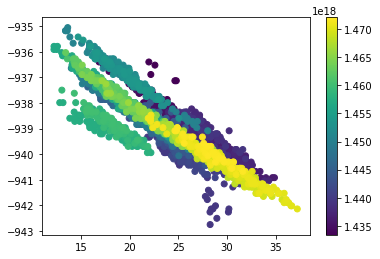

In [8]:
plt.scatter(
    x=df.drs_T_027, 
    y=B,
    c=df.index)
plt.colorbar()
None

We can clearly see these populations, despite me not being able to make such a nice colorbar.

Let's define a Temperature window and see ...

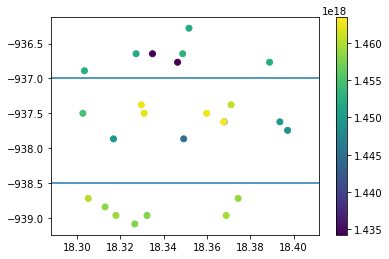

In [9]:
t_mask = (df.drs_T_027 > 18.3)&(df.drs_T_027 <= 18.4)
b = B[t_mask.values]
d = df[t_mask]
plt.scatter(
    x=d.drs_T_027, 
    y=b,
    c=d.index)
plt.colorbar()

high_limit = -937
low_limit = -938.5
plt.axhline(high_limit)
plt.axhline(low_limit)
None

In [10]:
low = d[b < low_limit]
high = d[b > high_limit]
len(low) , len(high)

(7, 7)

In [11]:
low.sort_index().iloc[-1][['fNight', 'fRunID', 'drs_T_027']]

fNight       20160409
fRunID             41
drs_T_027     18.3051
Name: 2016-04-09 21:31:11, dtype: object

In [12]:
high.sort_index().iloc[0][['fNight', 'fRunID', 'drs_T_027']]

fNight       20150613
fRunID             42
drs_T_027     18.3464
Name: 2015-06-13 22:09:33, dtype: object

Okay so we have identified two different calibration files, where the drs temperature differs only slightly, but where the BaselineMean values differ a lot and they are also from different "epochs", i.e. (6 month apart).



In [13]:
low_path = 'data/20160409_041.drs.fits.gz'
high_path = 'data/20150613_042.drs.fits.gz'

data_run = 'data/20160409_040.fits.fz' # near low calib run

In [15]:
f_with_high = zfits.FactFits(data_run, high_path)
f_with_low = zfits.FactFits(data_run, low_path)

(-2.1317842, 0.0086746177648071871)

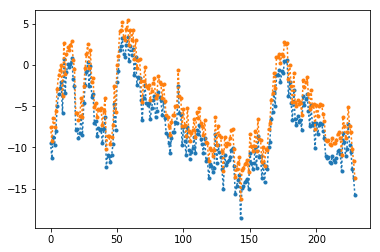

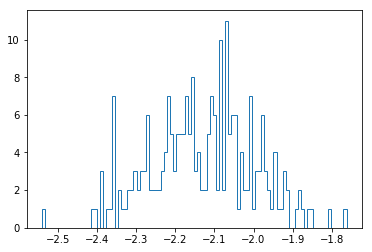

In [16]:
evt_id = 0

e_with_high = f_with_high.get_data_calibrated(evt_id)[1000, 20:-50] / 2
e_with_low = f_with_low.get_data_calibrated(evt_id)[1000, 20:-50] / 2
plt.plot(e_with_high, '.:', label='e_with_high')
plt.plot(e_with_low, '.:', label='e_with_low')

diff = e_with_high - e_with_low
plt.figure()
plt.hist(
    diff, 
    histtype='step',
    bins=100
)
diff.mean(), diff.std() / np.sqrt(len(diff))

(-2.1381841, 0.0083918143116670143)

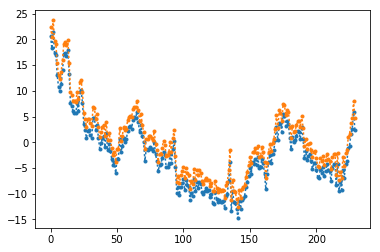

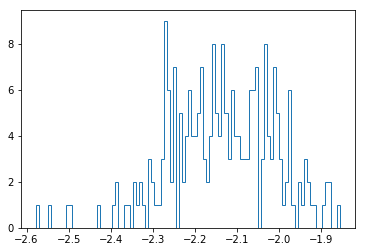

In [17]:
evt_id = 1

e_with_high = f_with_high.get_data_calibrated(evt_id)[1000, 20:-50] / 2
e_with_low = f_with_low.get_data_calibrated(evt_id)[1000, 20:-50] / 2
plt.plot(e_with_high, '.:', label='e_with_high')
plt.plot(e_with_low, '.:', label='e_with_low')

diff = e_with_high - e_with_low
plt.figure()
plt.hist(
    diff, 
    histtype='step',
    bins=100
)
diff.mean(), diff.std() / np.sqrt(len(diff))

(-2.1225479, 0.0087788676707626304)

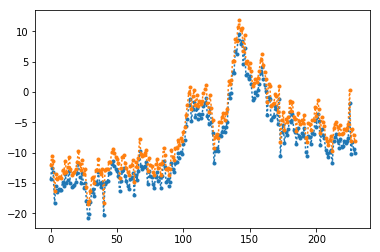

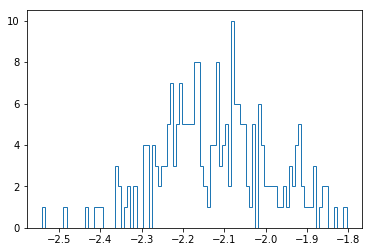

In [18]:
evt_id = 2

e_with_high = f_with_high.get_data_calibrated(evt_id)[1000, 20:-50] / 2
e_with_low = f_with_low.get_data_calibrated(evt_id)[1000, 20:-50] / 2
plt.plot(e_with_high, '.:', label='e_with_high')
plt.plot(e_with_low, '.:', label='e_with_low')

diff = e_with_high - e_with_low
plt.figure()
plt.hist(
    diff, 
    histtype='step',
    bins=100
)
diff.mean(), diff.std() / np.sqrt(len(diff))

In [19]:
import tqdm
f_with_high = zfits.FactFits(data_run, high_path)
f_with_low = zfits.FactFits(data_run, low_path)
diffs = []
for evt_id in tqdm.trange(1000):
    e_with_high = f_with_high.get_data_calibrated(evt_id)[1000, 20:-50] / 2
    e_with_low = f_with_low.get_data_calibrated(evt_id)[1000, 20:-50] / 2
    diff = e_with_high - e_with_low
    diffs.append(diff)
diffs = np.array(diffs)

100%|██████████| 1000/1000 [00:46<00:00, 21.59it/s]


(-2.141686, 0.00027056046778555382)

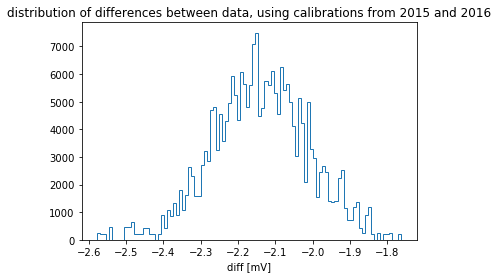

In [20]:
plt.hist(
    diffs.flat, 
    histtype='step',
    bins=100
)

plt.title("distribution of differences between data, using calibrations from 2015 and 2016")
plt.xlabel('diff [mV]')
diffs.mean(), diffs.std() / np.sqrt(diffs.size)